In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\ali42\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [10]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# dropout layer
model.add(Dropout(rate = 0.1))

# adding the third hidden layer
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))

# dropout layer
model.add(Dropout(rate = 0.1))

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 
model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
250/250 [==============================] - 5s 11ms/step - loss: 0.5965 - accuracy: 0.7969 - val_loss: 0.4792 - val_accuracy: 0.7850
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4528 - accuracy: 0.7991 - val_loss: 0.4562 - val_accuracy: 0.7850
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4443 - accuracy: 0.7991 - val_loss: 0.4527 - val_accuracy: 0.7850
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4391 - accuracy: 0.7991 - val_loss: 0.4506 - val_accuracy: 0.7850
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4364 - accuracy: 0.7991 - val_loss: 0.4475 - val_accuracy: 0.7850
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4391 - accuracy: 0.7991 - val_loss: 0.4462 - val_accuracy: 0.7850
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4359 - accuracy: 0.7991 - val_loss: 0.4437 - val_accuracy: 0.785

Epoch 58/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4245 - accuracy: 0.8329 - val_loss: 0.4288 - val_accuracy: 0.8195
Epoch 59/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4218 - accuracy: 0.8304 - val_loss: 0.4291 - val_accuracy: 0.8160
Epoch 60/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4249 - accuracy: 0.8307 - val_loss: 0.4292 - val_accuracy: 0.8185
Epoch 61/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4247 - accuracy: 0.8307 - val_loss: 0.4293 - val_accuracy: 0.8175
Epoch 62/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.8286 - val_loss: 0.4311 - val_accuracy: 0.8190
Epoch 63/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4234 - accuracy: 0.8325 - val_loss: 0.4289 - val_accuracy: 0.8180
Epoch 64/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8310 - val_loss: 0.4288 - val_accuracy:

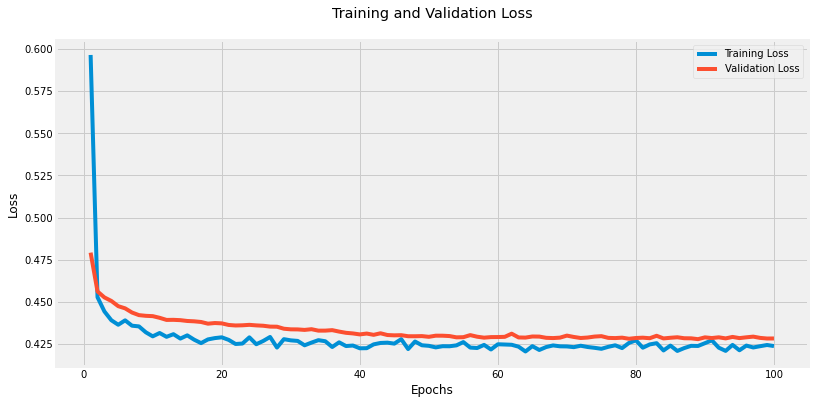

In [19]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

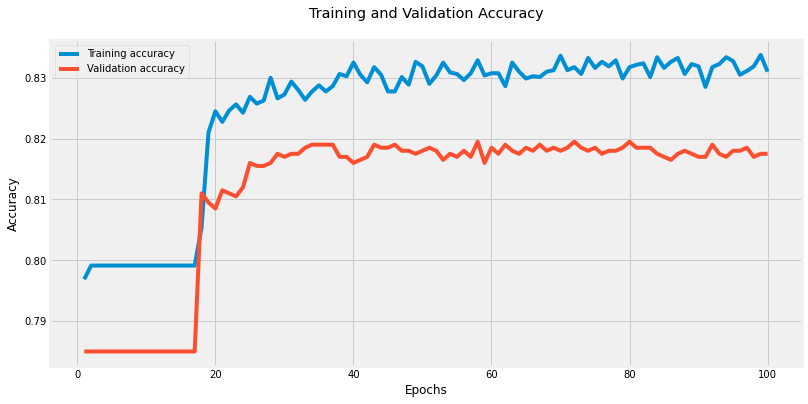

In [23]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('churn3.png')
plt.show()

In [24]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

63/63 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8175
Accuracy of model is 0.8174999952316284


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 2)                 14        
                                                                 
Total params: 122 (488.00 Byte)
Trainable params: 122 (488.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
